In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
np.random.seed(8)

In [54]:
# load autodesign
auto_data = pd.read_csv('data/auto_design.csv')
# split into input (X) and output (Y) variables
X =auto_data.drop('Unnamed: 0', 1)
from sklearn.model_selection import train_test_split
 
X_train, X_test  = train_test_split(X, test_size=0.3, random_state=42)
print(X_train)
X_train.shape

     mpg  cyl   disp   hp    drat       wt     qsec  vs  am  gear  carb  ID
4   18.7    8  360.0  175    3.15    3.440    17.02   0   0     3     2   5
16  14.7    8  440.0  230    3.23    5.345    17.42   0   0     3     4  17
5   18.1    6  225.0  105    2.76    3.460    20.22   1   0     3     1   6
13  15.2    8  275.8  180    3.07    3.780    18.00   0   0     3     3  14
11  16.4    8  275.8  180    3.07    4.070    17.40   0   0     3     3  12
23  13.3    8  350.0  245    3.73    3.840    15.41   0   0     3     4  24
1   21.0    6  160.0  110    3.90    2.875    17.02   0   1     4     4   2
2   22.8    4  108.0   93    3.85    2.320    18.61   1   1     4     1   3
26  26.0    4  120.3   91    4.43    2.140    16.70   0   1     5     2  27
3   21.4    6  258.0  110    3.08    3.215    19.44   1   0     3     1   4
21  15.5    8  318.0  150    2.76    3.520    16.87   0   0     3     2  22
27  30.4    4   95.1  113    3.77    1.513    16.90   1   1     5     2  28
22  15.2    

(22, 12)

In [55]:
input_dim = X_train.shape[1]
encoding_dim = 12
input_layer = Input(shape=(input_dim, ))

In [56]:
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(12, activation='linear')(encoded)

In [57]:
# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [58]:
X_train = np.array(X_train)
autoencoder.fit(X_train, X_train,epochs=100,batch_size=4)

Epoch 1/100
22/22 [==============================] - 0s - loss: 28985.7149     
Epoch 2/100
22/22 [==============================] - 0s - loss: 28571.5341     
Epoch 3/100
22/22 [==============================] - 0s - loss: 28183.4400     
Epoch 4/100
22/22 [==============================] - 0s - loss: 27798.2921     
Epoch 5/100
22/22 [==============================] - 0s - loss: 27422.6434     
Epoch 6/100
22/22 [==============================] - 0s - loss: 27080.4889    
Epoch 7/100
22/22 [==============================] - 0s - loss: 26722.0817     
Epoch 8/100
22/22 [==============================] - 0s - loss: 26391.1487     
Epoch 9/100
22/22 [==============================] - 0s - loss: 26058.9774     
Epoch 10/100
22/22 [==============================] - 0s - loss: 25679.5051     
Epoch 11/100
22/22 [==============================] - 0s - loss: 25321.6319     
Epoch 12/100
22/22 [==============================] - 0s - loss: 25028.8053     
Epoch 13/100
22/22 [==================

In [59]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)

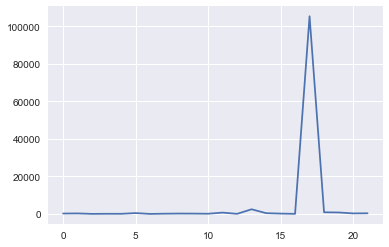

In [60]:
plt.plot(mse)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'